In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [2]:
file_path = "2016.csv"
df = pd.read_csv(file_path)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.59,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      153 non-null    float64
 5   Upper Confidence Interval      155 non-null    object 
 6   Economy (GDP per Capita)       156 non-null    object 
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       155 non-null    object 
 9   Freedom                        157 non-null    object 
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [4]:
col = ['Upper Confidence Interval', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom']
df[col] = df[col].apply(pd.to_numeric, errors='coerce')

In [5]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        4
Upper Confidence Interval        3
Economy (GDP per Capita)         2
Family                           0
Health (Life Expectancy)         3
Freedom                          1
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      153 non-null    float64
 5   Upper Confidence Interval      154 non-null    float64
 6   Economy (GDP per Capita)       155 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       154 non-null    float64
 9   Freedom                        156 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [7]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,153.000000,154.000000,155.000000,157.000000,154.000000,156.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.268641,5.472753,0.951772,0.793621,0.553342,0.370999,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.151503,1.136438,0.413207,0.266706,0.229347,0.145975,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.322000,4.463500,0.650655,0.641840,0.374045,0.257225,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.226000,5.408500,1.027800,0.841420,0.595885,0.397625,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.128000,6.422000,1.277855,1.021520,0.720680,0.484932,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


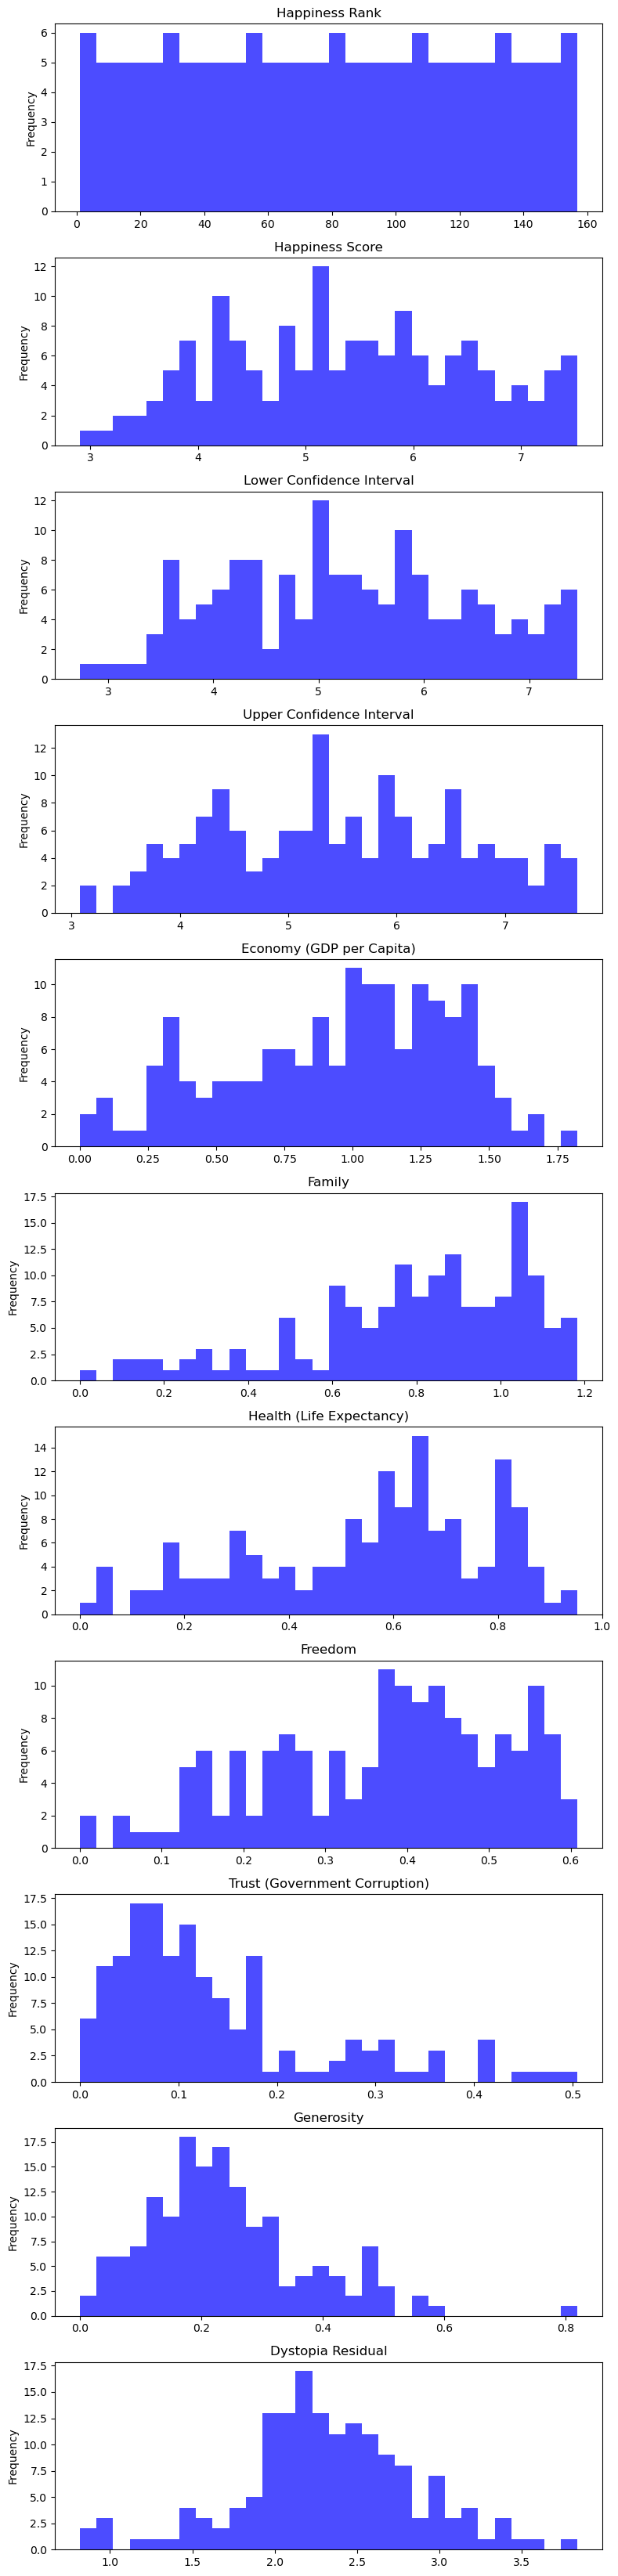

In [8]:
# Select only numeric columns
num_cols = df.select_dtypes(include=['number']).columns

# Create subplots
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(8, len(num_cols) * 3))

# Loop through each column and plot
for ax, col in zip(axes, num_cols):
    df[col].plot(kind='hist', ax=ax, bins=30, alpha=0.7, color='blue')
    ax.set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        4
Upper Confidence Interval        3
Economy (GDP per Capita)         2
Family                           0
Health (Life Expectancy)         3
Freedom                          1
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [10]:
cols = ['Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom']

df[cols] = df[cols].fillna(df[cols].median())

In [11]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

- Identify the GDP per capita and Healthy Life Expectancy of the top 10 countries and represent it as a bar chart

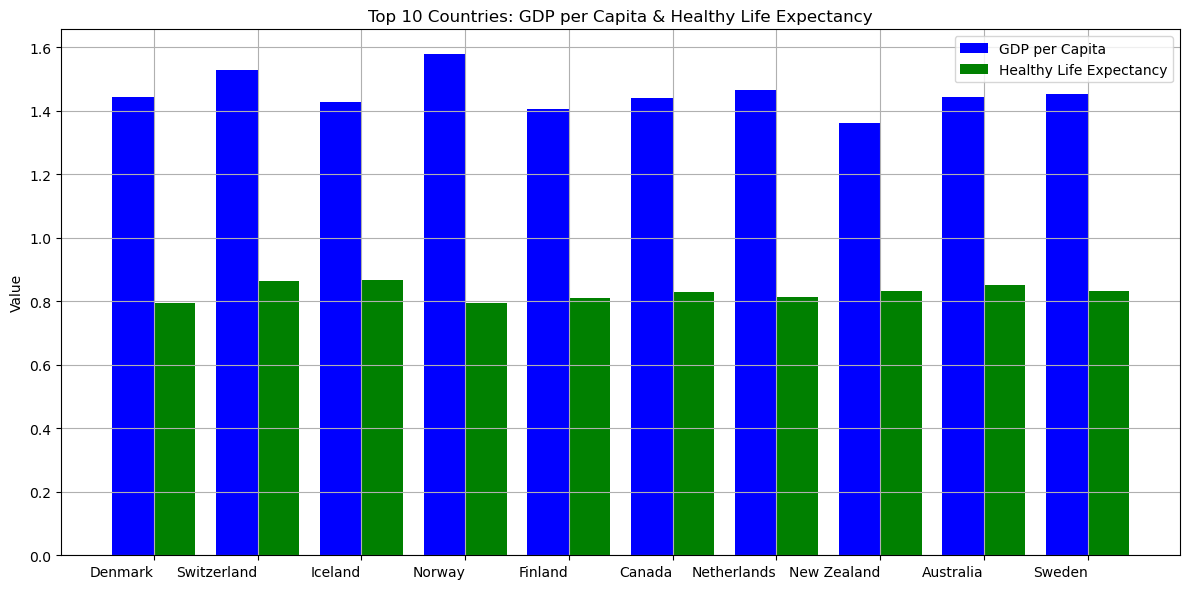

In [12]:
import matplotlib.pyplot as plt

# Select top 10 countries based on GDP per Capita
top_10 = df.nsmallest(10, 'Happiness Rank')

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4  # Width of bars

# X-axis positions
x = range(len(top_10))

# Bar chart
ax.bar(x, top_10['Economy (GDP per Capita)'], width=bar_width, label='GDP per Capita', color='blue')
ax.bar([i + bar_width for i in x], top_10['Health (Life Expectancy)'], width=bar_width, label='Healthy Life Expectancy', color='green')

# Labels & Title
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(top_10['Country'], rotation=0, ha='right')
ax.set_ylabel('Value')
ax.set_title('Top 10 Countries: GDP per Capita & Healthy Life Expectancy')
ax.grid()
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


- Find the correlation between the Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, and Happiness Score

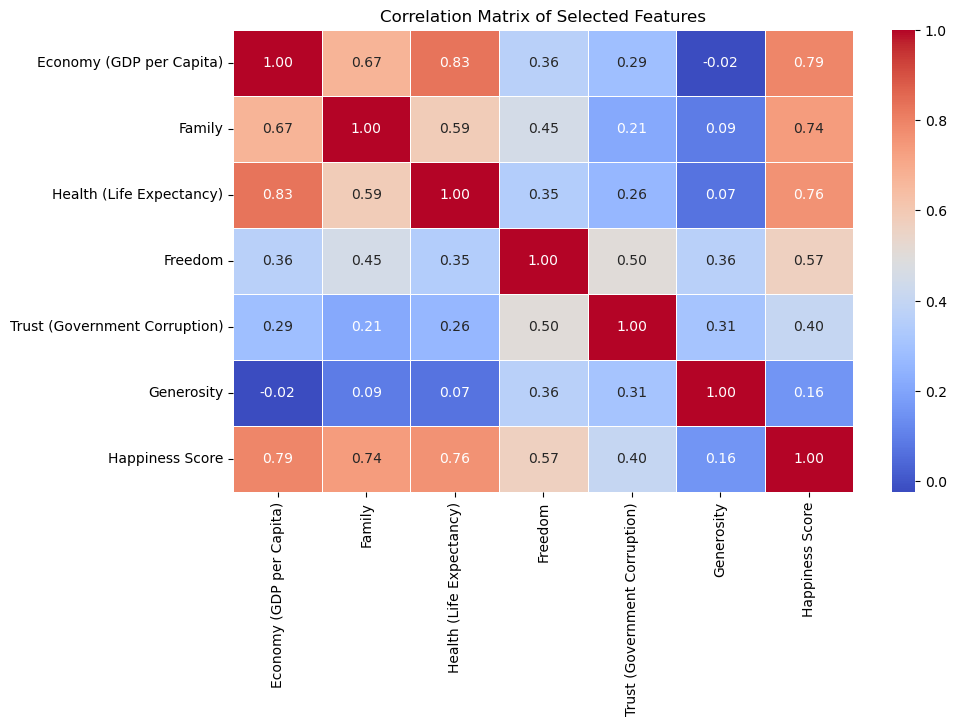

In [13]:
import seaborn as sns

cols = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Happiness Score']

# Compute correlation matrix
corr_matrix = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Selected Features")
plt.show()


- Create a scatter plot to identify the effect of GDP per Capita on Happiness Score in various Regions

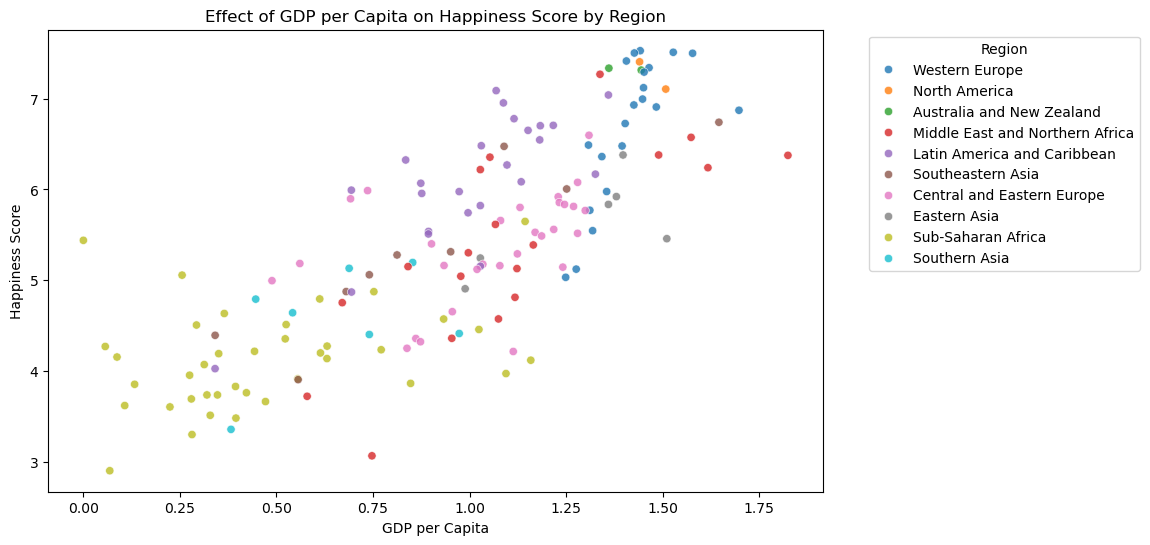

In [14]:
# Scatter plot with color-coded regions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Economy (GDP per Capita)', y='Happiness Score', hue='Region', palette='tab10', alpha=0.8)

# Labels and title
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Effect of GDP per Capita on Happiness Score by Region')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


- Create a pie chart to present Happiness Score by region

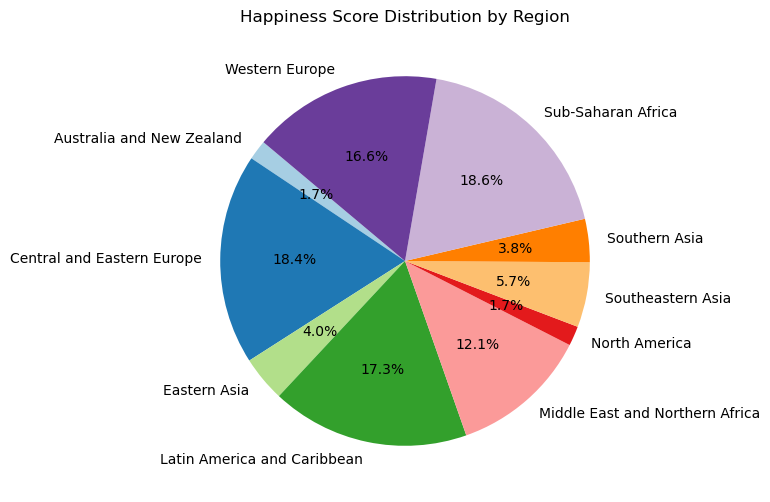

In [15]:
# Aggregate Happiness Score by Region
region_happiness = df.groupby('Region')['Happiness Score'].sum()

# Plot Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(region_happiness, labels=region_happiness.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)

# Title
plt.title('Happiness Score Distribution by Region')

# Show plot
plt.show()


- Create a map to display GDP per capita of countries and include Healthy Life Expectancy to be shown as a tooltip

In [16]:
#pip install folium

In [17]:
#pip install geopy

In [18]:
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapi")

# Function to get latitude & longitude from country name
def get_location(country):
    try:
        location = geolocator.geocode(country)
        return location.latitude, location.longitude
    except:
        return None, None

# Add latitude & longitude to the DataFrame
df['Latitude'], df['Longitude'] = zip(*df['Country'].apply(get_location))

# Drop rows where geolocation failed
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create map centered around the world
world_map = folium.Map(location=[20, 0], zoom_start=2)

# Add markers for each country
marker_cluster = MarkerCluster().add_to(world_map)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Economy (GDP per Capita)'] * 5,  # Scale GDP for visualization
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6,
        popup=f"{row['Country']}<br>GDP per Capita: {row['Economy (GDP per Capita)']}<br>Healthy Life Expectancy: {row['Health (Life Expectancy)']}"
    ).add_to(marker_cluster)

# Show map
world_map
